In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df_train = pd.read_csv('./input/train.csv')

In [17]:
#checking the cloumns
len(df_train.columns)

81

In [18]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

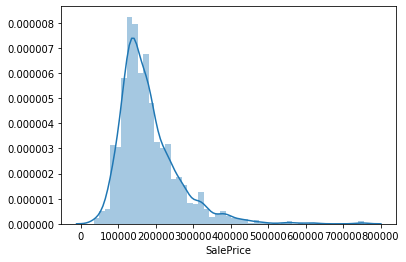

In [20]:
#histogram
sns.distplot(df_train['SalePrice']);

# Findings:

1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. Show peakedness



In [22]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())  #shows how distortion or asymmetry in a symmetrical bell curve, or normal distribution
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) # shows how pointy the data is

Skewness: 1.882876
Kurtosis: 6.536282


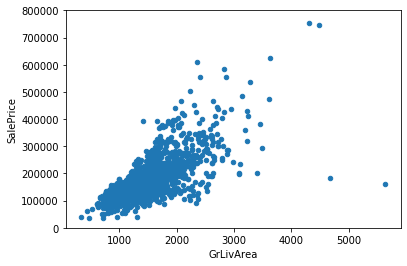

In [29]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


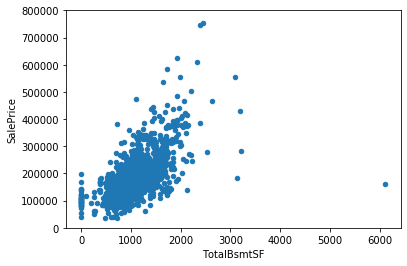

In [30]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

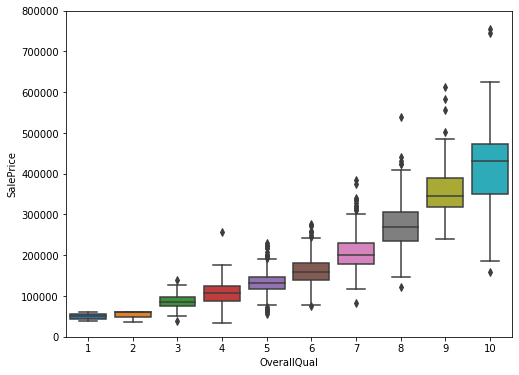

In [37]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [38]:
df_train['OverallQual'].head(20)

0     7
1     6
2     7
3     7
4     8
5     5
6     8
7     7
8     7
9     5
10    5
11    9
12    5
13    7
14    6
15    7
16    6
17    4
18    5
19    5
Name: OverallQual, dtype: int64

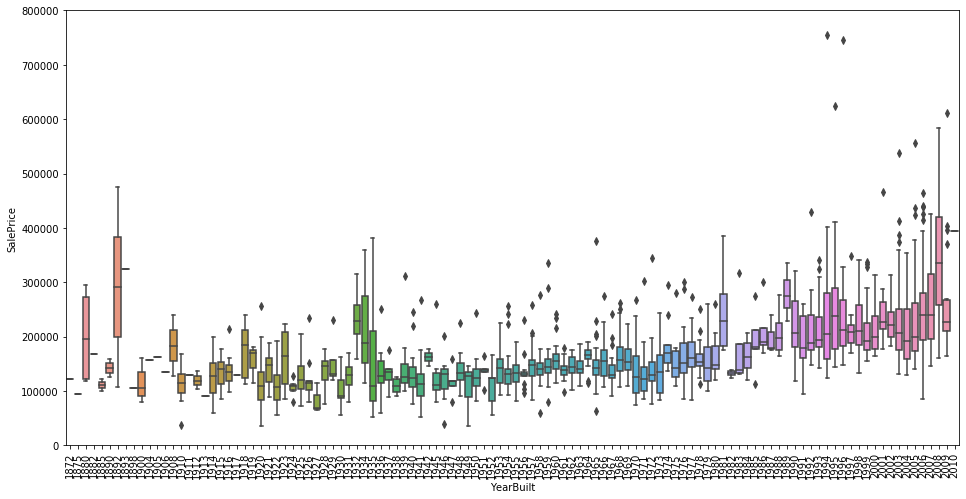

In [39]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

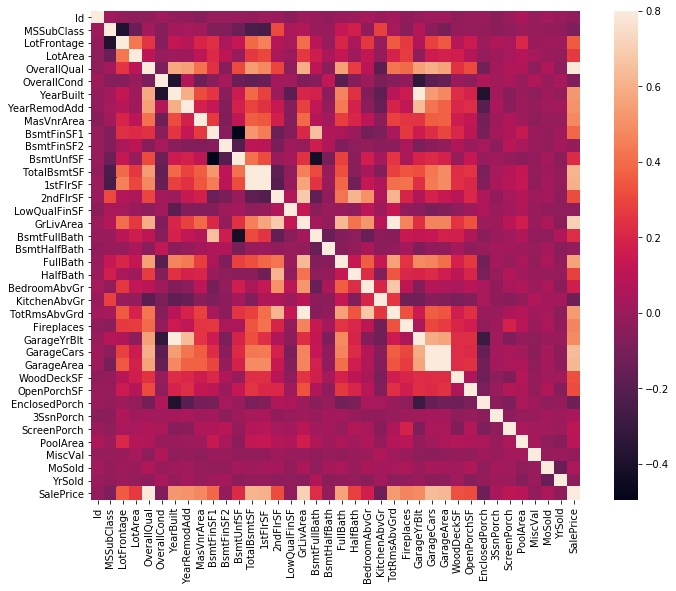

In [46]:
#correlation matrix
corrmat = df_train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

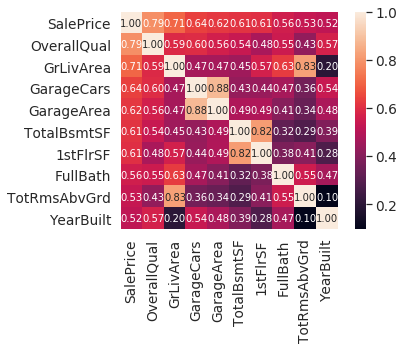

In [53]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.xticks(rotation=90);
plt.show()

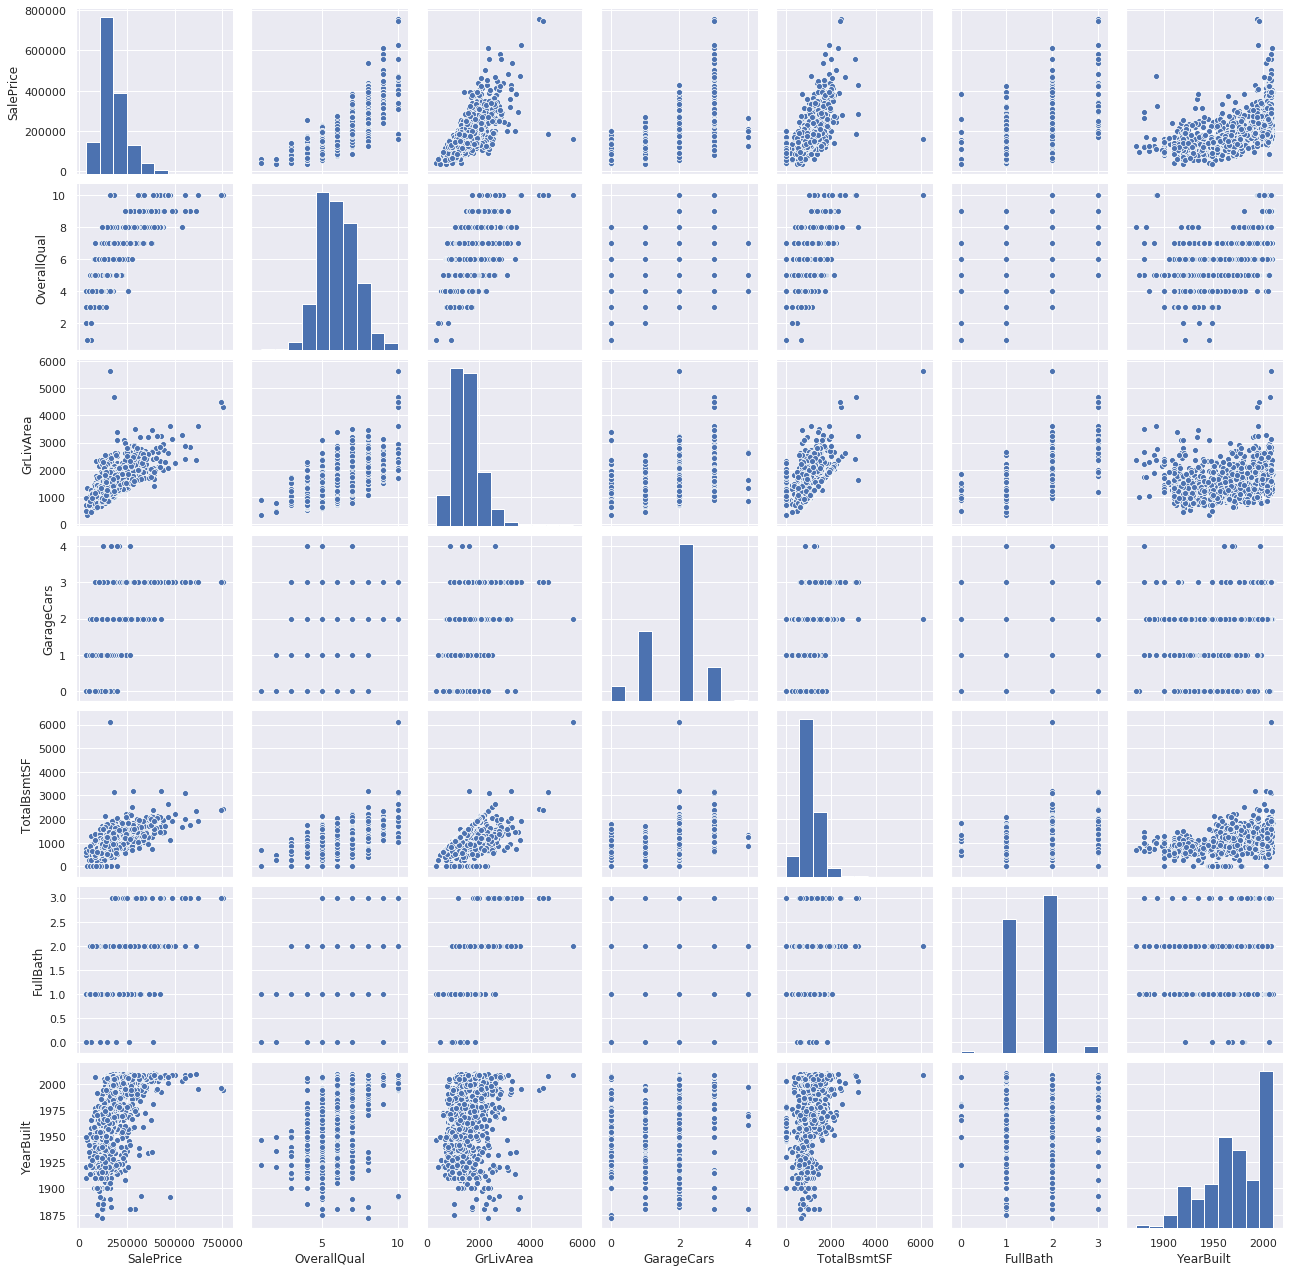

In [54]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [59]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


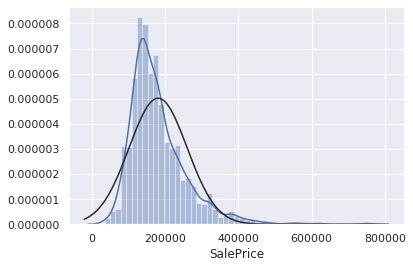

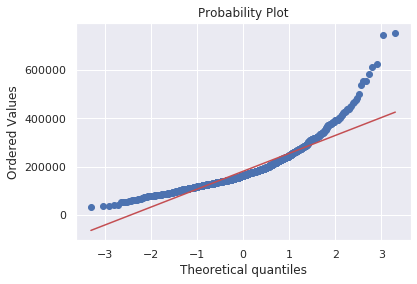

In [60]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [61]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

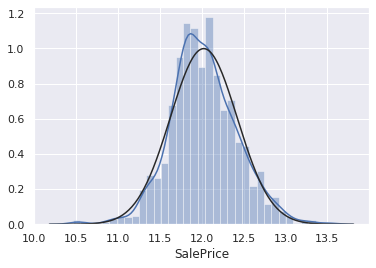

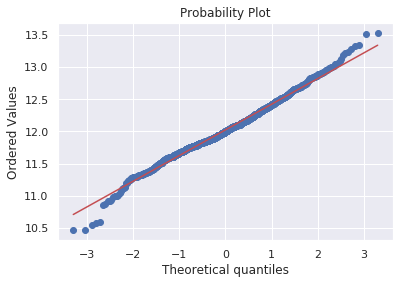

In [62]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

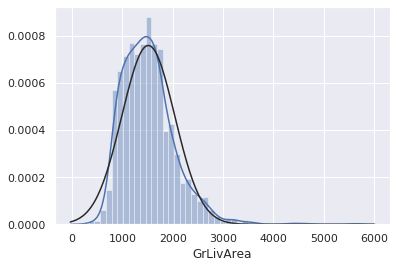

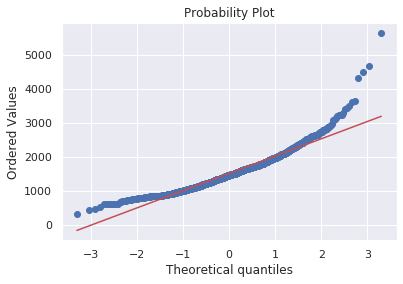

In [63]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [64]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

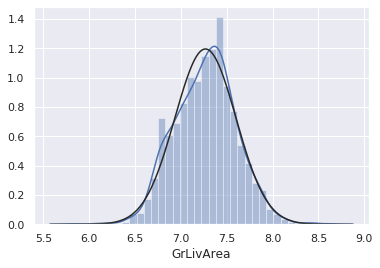

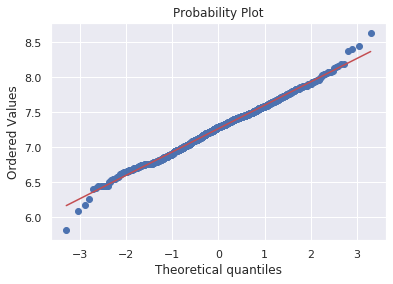

In [65]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

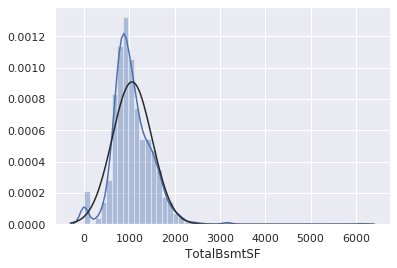

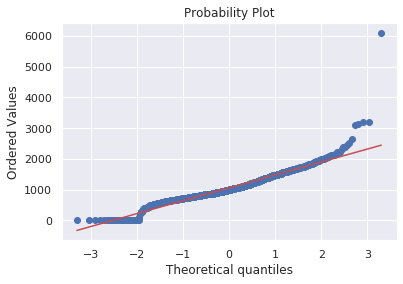

In [66]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [67]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [68]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

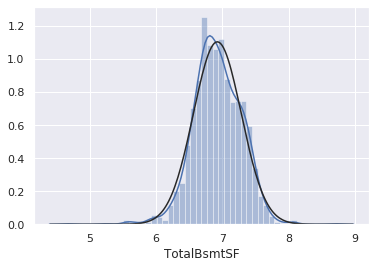

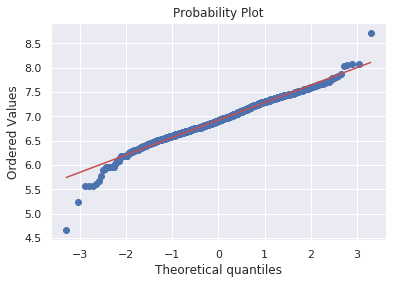

In [69]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

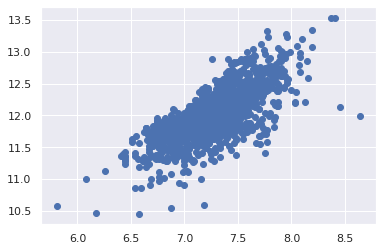

In [70]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

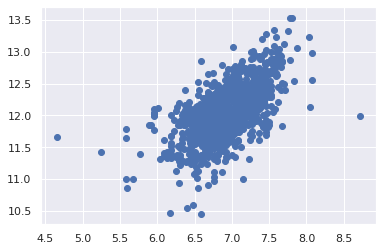

In [71]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [75]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [76]:
pip install xgboost

     |████████████████████████████████| 148.9 MB 21 kB/s  eta 0:00:01    |███                             | 13.6 MB 3.7 MB/s eta 0:00:37     |███████████▋                    | 54.1 MB 3.1 MB/s eta 0:00:31     |███████████████▉                | 73.8 MB 3.5 MB/s eta 0:00:22     |████████████████                | 74.4 MB 3.5 MB/s eta 0:00:22     |████████████████▋               | 77.4 MB 3.4 MB/s eta 0:00:22     |████████████████████▉           | 97.0 MB 3.0 MB/s eta 0:00:18     |██████████████████████▋         | 105.1 MB 3.8 MB/s eta 0:00:12     |███████████████████████▊        | 110.6 MB 3.9 MB/s eta 0:00:10     |██████████████████████████▍     | 122.8 MB 3.8 MB/s eta 0:00:07     |████████████████████████████▍   | 132.4 MB 3.5 MB/s eta 0:00:05     |█████████████████████████████   | 135.2 MB 3.3 MB/s eta 0:00:05     |█████████████████████████████▋  | 137.9 MB 3.9 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


## Now Predicting salesprice

In [4]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt

In [3]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 708 kB/s eta 0:00:01


In [6]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [7]:
data = pd.concat([train, test], ignore_index=True)

In [8]:
row_count = data.shape[0]

In [9]:
print(row_count)

2919


In [10]:
null_val = ((data.isnull().sum() / row_count)*100).to_frame().reset_index()

In [11]:
null_val.columns = ['Column', 'Null Val']

In [12]:
null_val.head(10)

,Column,Null Val
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.137033
3,LotFrontage,16.649538
4,LotArea,0.000000
5,Street,0.000000
6,Alley,93.216855
7,LotShape,0.000000
8,LandContour,0.000000
9,Utilities,0.068517


In [13]:
abv_50_nan = null_val.loc[null_val['Null Val'] > 50, 'Column'].tolist()
null_val_cols = null_val.loc[~(null_val['Column'].isin(abv_50_nan)) & (null_val['Null Val'] > 0), 'Column'].tolist()[:-1]

In [14]:
for col in null_val_cols:
    col_dtype = data[col].dtype
    if col_dtype == 'object':
        mode = data[col].value_counts().index[0]
        data[col] = data[col].fillna(mode)
    else:
        median = data[col].median()
        data[col] = data[col].fillna(median)

In [15]:
drop_cols = ['Id'] + abv_50_nan
processed_data = data.drop(drop_cols, axis=1)

In [16]:
le = LabelEncoder()
for col in processed_data.select_dtypes('object').columns:
    processed_data[col] = le.fit_transform(processed_data[col])

In [17]:
new_train = processed_data[processed_data['SalePrice'].notnull()]

In [18]:
new_test = processed_data[processed_data['SalePrice'].isnull()].drop(['SalePrice'], axis=1)


In [19]:
X = new_train.drop('SalePrice', axis=1)
y = new_train['SalePrice']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
model_dict = {
    'LinearRegession': LinearRegression(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(alpha=10.0),
    'RandomForestRegressor': RandomForestRegressor(random_state=0, n_estimators=100, max_depth=4),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0, n_estimators=100, max_depth=4, learning_rate=0.1),
    'XGBRegressor': XGBRegressor(random_state=0, n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8),
    'LGBMRegressor': LGBMRegressor(random_state=0, n_estimators=100, max_depth=4)
}


In [23]:
data_list = list()
for name, model in model_dict.items():
    data_dict = dict()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    data_dict['model'] = name
    data_dict['train _score'] = train_score
    data_dict['test_score'] = test_score
    data_list.append(data_dict)
score_df = pd.DataFrame(data_list)
score_df['score_diff'] = score_df['train_score'] - score_df['test_score']
model_df = score_df.sort_values(['test_score'], ascending=[False])
model_df[model_df['test_score'] > 0.75]

/home/sushmita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50998434829.17694, tolerance: 566931384.7288021
  positive)


,model,train_score,test_score,score_diff
4,GradientBoostingRegressor,0.986169,0.884208,0.101961
5,XGBRegressor,0.983776,0.877581,0.106195
6,LGBMRegressor,0.956683,0.865176,0.091507
3,RandomForestRegressor,0.874905,0.830464,0.044441
1,Ridge,0.854063,0.809717,0.044346
2,Lasso,0.855022,0.807428,0.047594
0,LinearRegession,0.855054,0.806964,0.048090
